In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/melspec8_1/train/',
                                                 target_size = (64, 64),
                                                 shuffle=True)

Found 10813 images belonging to 15 classes.


In [6]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/melspec8_1/val/',
                                            target_size = (64, 64),
                                            shuffle=False)

Found 1319 images belonging to 15 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(64, 64, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [9]:
from keras.callbacks import History 
history = History()

In [10]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 256)       2

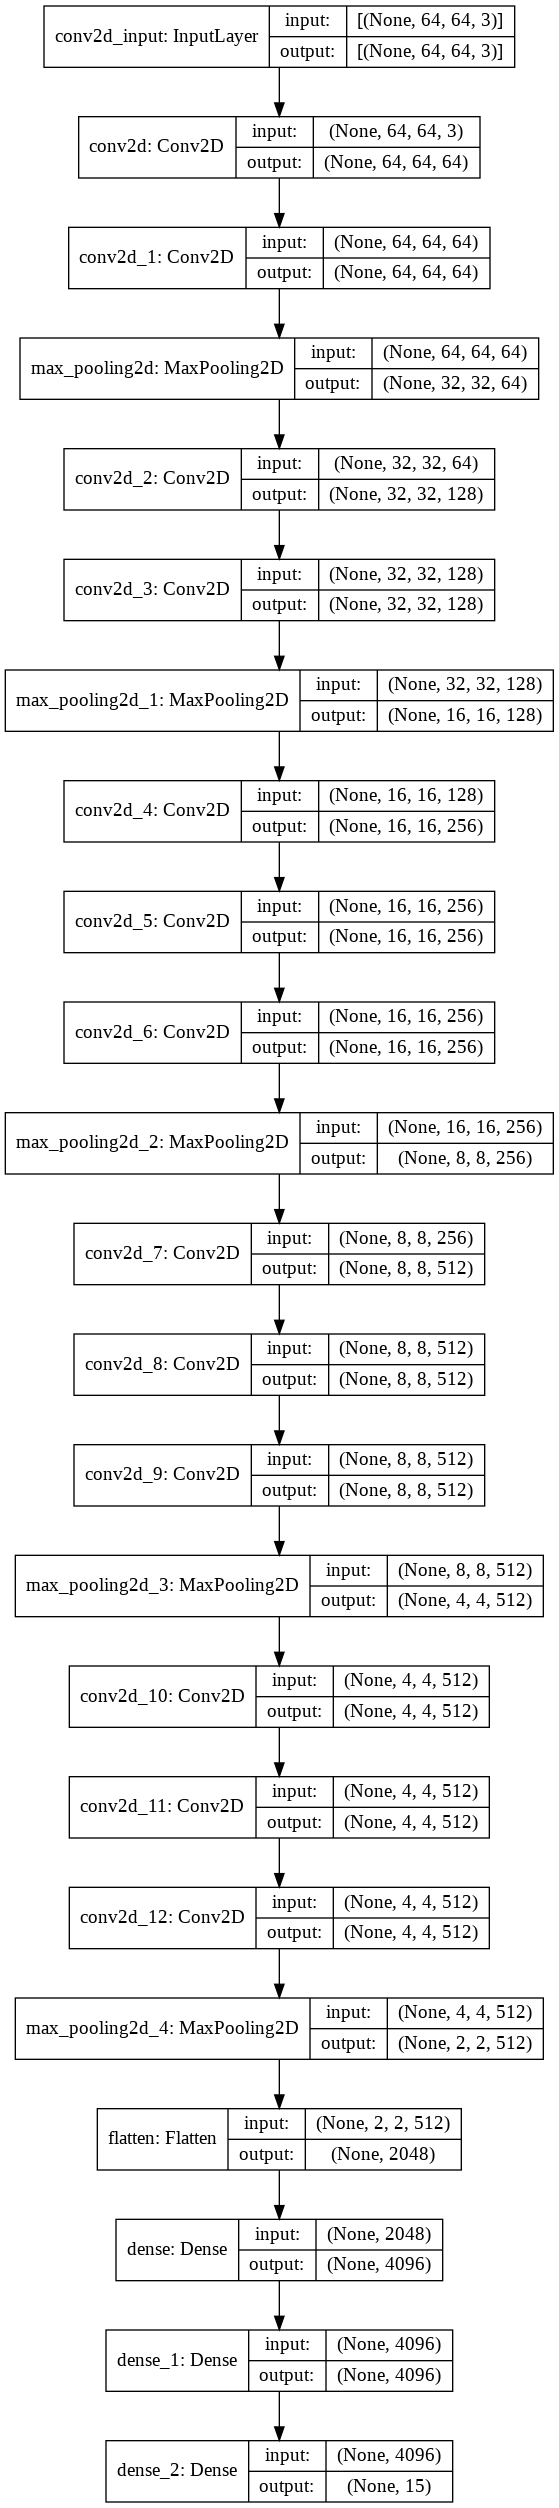

In [12]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [13]:
History = model.fit(training_set, validation_data = test_set, batch_size=16,epochs=11,callbacks=[history])

Epoch 1/11
338/338 [==============================] - 4270s 13s/step - loss: 2.3009 - accuracy: 0.2454 - val_loss: 2.0259 - val_accuracy: 0.3199
Epoch 2/11
338/338 [==============================] - 1820s 5s/step - loss: 1.7660 - accuracy: 0.4145 - val_loss: 1.7023 - val_accuracy: 0.4268
Epoch 3/11
338/338 [==============================] - 1844s 5s/step - loss: 1.5120 - accuracy: 0.4977 - val_loss: 1.4146 - val_accuracy: 0.5277
Epoch 4/11
338/338 [==============================] - 1801s 5s/step - loss: 1.3225 - accuracy: 0.5705 - val_loss: 1.3454 - val_accuracy: 0.5709
Epoch 5/11
338/338 [==============================] - 1803s 5s/step - loss: 1.1558 - accuracy: 0.6352 - val_loss: 1.3624 - val_accuracy: 0.5466
Epoch 6/11
338/338 [==============================] - 1809s 5s/step - loss: 1.0385 - accuracy: 0.6747 - val_loss: 1.1840 - val_accuracy: 0.6338
Epoch 7/11
338/338 [==============================] - 1803s 5s/step - loss: 0.9245 - accuracy: 0.7116 - val_loss: 1.1708 - val_accuracy

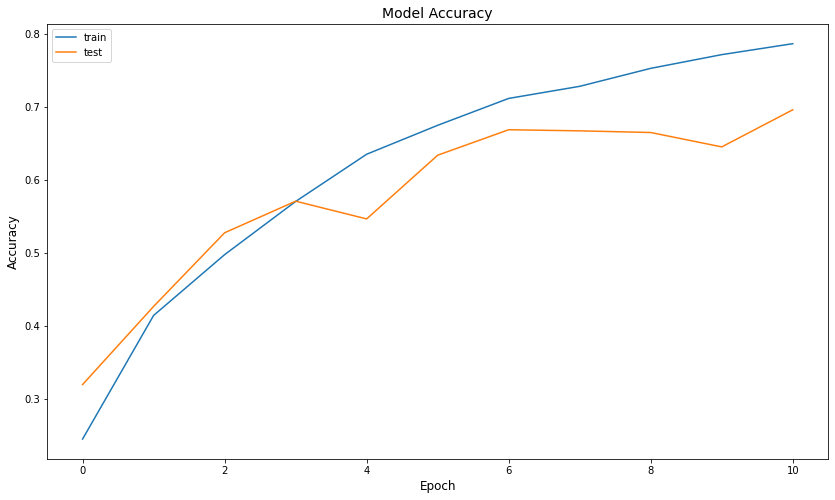

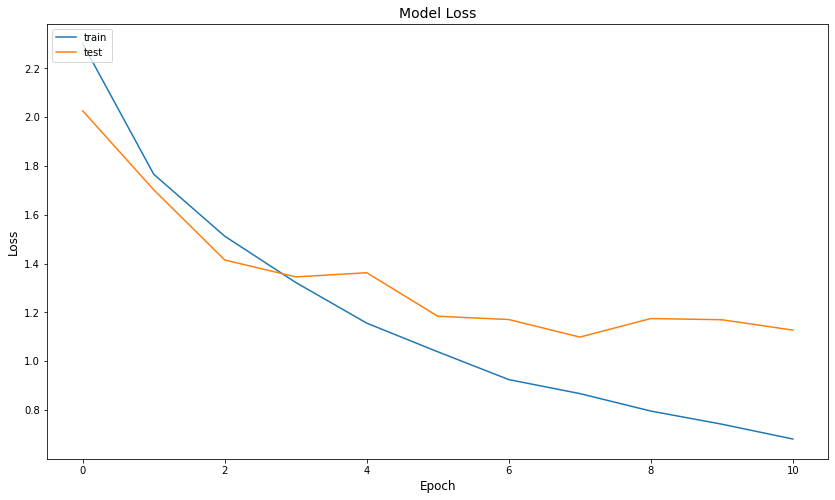

In [14]:
plt.figure(figsize=(14,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [16]:
target_names = []
for key in training_set.class_indices:
  target_names.append(key)

print(target_names)

['0Dryoc', '10Pycno', '11Corvu', '12Elanu', '13Anthr', '14Dicru', '1Capri', '2Pnoep', '3Malac', '4Anthi', '5Ortho', '6Pycno', '7Malac', '8Malac', '9Pachy']


In [17]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])

42/42 [==============================] - 54s 1s/step - loss: 1.1273 - accuracy: 0.6960
n Test_Accuracy:- 0.6959818005561829


confusion matrix
[[102   0   3   7   3   3   0   0   0   0   1   7   1   0   0]
 [  0  10   0   0   1   0   0   0   0   0   1   0  14   1   0]
 [  7   0  40   3   0   1   2   1   0   0   0   0   0   0   0]
 [  1   0   3 179   3   1   0   3   1   0   0   0   2   0   1]
 [  6   0   4   0  36   1   2   0   4   0   2   3   0   2   1]
 [  8   1   2   6   8  46   3   0   6   1   5   2   7   8   0]
 [  3   0   5  11   4   6  90   1   7   0   0   0   0   2   3]
 [  0   0   0  19   1   0   0 161   0   5   0   0   4   0   0]
 [  0   1   0  13   0   1   0   1   9   0   1   0   3   7   1]
 [  0   0   0   1   0   0   0   4   0  55   0   0   0   1   1]
 [  1   1   0   0   1   5   0   0  10   0  56   1   5  17   1]
 [  0   3   0   0   0   4   0   0   0   0   2   9   1   5   1]
 [  0   2   0   1   1   5   0   0   2   1   1   0  56   3   0]
 [  2   0   2   3   0   0   0   0   3   0   1   1   1  58   1]
 [  2   9   0   8   6   1   0   3   1   0   1   0   8  15  11]]


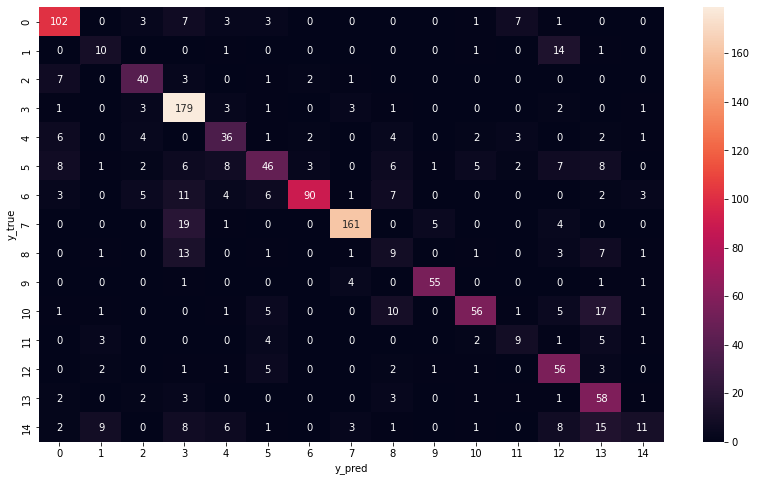

In [18]:
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [19]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names ))

Classification Report
              precision    recall  f1-score   support

      0Dryoc       0.77      0.80      0.79       127
     10Pycno       0.37      0.37      0.37        27
     11Corvu       0.68      0.74      0.71        54
     12Elanu       0.71      0.92      0.80       194
     13Anthr       0.56      0.59      0.58        61
     14Dicru       0.62      0.45      0.52       103
      1Capri       0.93      0.68      0.79       132
      2Pnoep       0.93      0.85      0.88       190
      3Malac       0.21      0.24      0.23        37
      4Anthi       0.89      0.89      0.89        62
      5Ortho       0.79      0.57      0.66        98
      6Pycno       0.39      0.36      0.37        25
      7Malac       0.55      0.78      0.64        72
      8Malac       0.49      0.81      0.61        72
      9Pachy       0.52      0.17      0.26        65

    accuracy                           0.70      1319
   macro avg       0.63      0.61      0.61      1319
weig